# Social Network Data Analysis 
* Average Degree
* Average clustering coefficient
* Diameter
* Degree Distribution 


## 連接Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

!ls '/content/drive/My Drive/Social_Network/HW1'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
com-youtube.ungraph.txt  HW1.ipynb


## 讀取資料
### 資料：
* nodes - 總結點數
* edges - 總邊數
* pares - list紀錄所有邊 (from, to)

In [0]:
file = '/content/drive/My Drive/Social_Network/HW1/com-youtube.ungraph.txt'
nodes = 0
edges = 0
pares = []
with open(file,'r') as f:
  i = 0
  n = 10
  for line in f:
    line = line.strip('\n')
    if i == 2: # Nodes: 1134890 Edges: 2987624
      nodes = int(line.split(' ')[2])
      edges = int(line.split(' ')[4])
    if i > 3:
      pares.append((line.split('\t')[0], line.split('\t')[1]))
    i += 1

In [0]:
len(pares)

2987624

## 建立網路

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

G = nx.Graph()
# test data
p_test = []
for i in range(1000000):
  p_test.append(pares[randint(0, 2987624)])
  
G.add_edges_from(p_test)

In [0]:
#印出網路圖
nx.draw(G, pos=nx.spring_layout(G), node_size=8, width=2, with_labels=False)
plt.plot()
plt.title('youtube relationship network graph') 

## Average Degree
### Average Degree = 2 * #edges / #nodes

In [0]:
ad = 2 * edges / nodes

In [0]:
ad

5.265045951590022

## Average Clustering Coefficient


In [0]:
acc = nx.average_clustering(G)

In [0]:
acc

0.08080227776187864

## Diameter

In [0]:
d = nx.diameter(G)

In [0]:
d

4

## Degree Distribution

Text(0.5, 1.0, 'Degree Distribution')

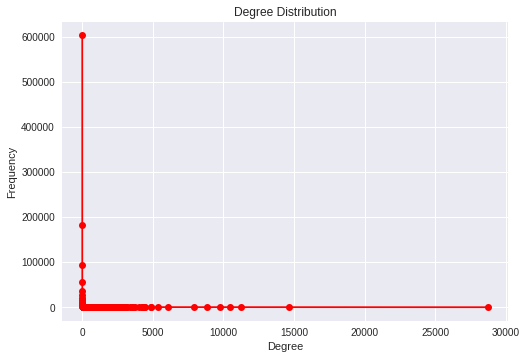

In [0]:
import collections
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
datax, datay = zip(*degreeCount.items())
# plt.bar(datax, datay, width=0.80, color='b')
plt.plot(datax, datay, color='red', marker='o', linestyle='solid')
plt.plot()
plt.xlabel('Degree')  
plt.ylabel('Frequency')  
plt.title('Degree Distribution')  

## Diameter-BoundingDiameter

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


[]

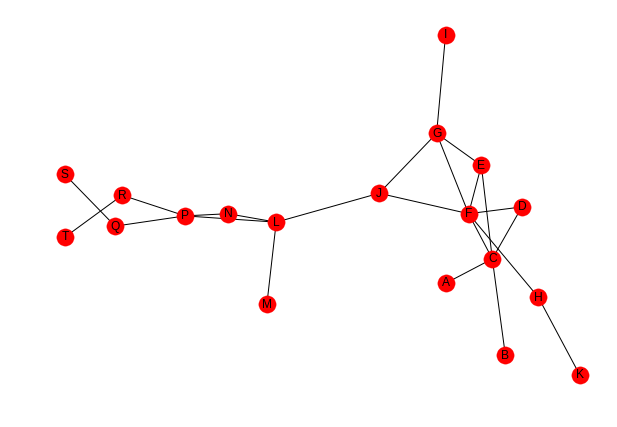

In [0]:
#test data
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
e = [('A','C'),('B','C'),('C','D'),('C','F'),('C','E'),('D','F'),('E','F'),('E','G'),('F','G'),('F','J'),('F','H'),('G','I'),('G','J'),('H','K'),('J','L'),('L','M'),('L','N'),('L','P'),('N','P'),('P','R'),('P','Q'),('Q','S'),('R','T')]
G.add_edges_from(e)
#印出網路圖
nx.draw(G, pos=nx.spring_layout(G), with_labels=True)
plt.plot()

### Initial

In [0]:
import sys

W = set(G.nodes()) 
eL = {}
eU = {}
degrees = {}

# initial all upper and lower bound of eccentricity and degree_list
for w in W:
  eL[w] = -sys.maxsize-1
  eU[w] = sys.maxsize
  degrees[w] = nx.degree(G, w)
  
# find the largest degree
ldv = max(degrees, key=degrees.get)
sp = nx.single_source_shortest_path_length(G,ldv)
ev = max(sp.values())
for w in W:
  d_v_w = nx.shortest_path_length(G, ldv, w)
  eL[w] = max(eL[w], max(ev-d_v_w, d_v_w))
  eU[w] = min(eU[w], ev+d_v_w)
# initial the upper and lower bound of diameter
L = max(sp.values())
U = L * 2
# remove list
r = set()
r.add(ldv)

In [0]:
def selectFrom(sp, r):
  v = max(sp, key=sp.get)
  while v in r:
    del sp[v]
    v = max(sp, key=sp.get)
  return v
  

### main algorithm

In [0]:
while L != U and W != set():
  v = selectFrom(sp, r)
  r.add(v)
  sp = nx.single_source_shortest_path_length(G,v)
  ev = max(sp.values())
  L = max(L, ev)
  U = min(U, 2*ev)
  for w in W:
    d_v_w = nx.shortest_path_length(G, v, w)
    eL[w] = max(eL[w], max(ev-d_v_w, d_v_w))
    eU[w] = min(eU[w], ev+d_v_w)
    if (eU[w] <= L) and (eL[w] >= (U/2)) or (eL[w] == eU[w]):
      W = W - {w}
      del sp[w]
      r.add(w)
  
d = L  

In [0]:
d